# 조사 자료 : 최근 10년 광역단체별 청년인구(2011~2021년)
  * 나이대 : 20세~34세
  * 행정구역(읍면동)별/5세별 주민등록인구(2011년~2021년)
    - 출처 : 국가통계포털(https://kosis.kr/index/index.do)

In [1]:
import pandas as pd
import numpy as np

In [2]:
# 파일 경로 지정

file_path = "./pop_youth_2011to2021.csv"

# 파일을 읽어 들여서 DataFrame 형태로 읽어들이기

df= pd.read_csv(file_path)

df.head()

,행정구역(동읍면)별,항목,2021,2021.1,2021.2,2021.3,2020,2020.1,2020.2,2020.3,...,2013.2,2013.3,2012,2012.1,2012.2,2012.3,2011,2011.1,2011.2,2011.3
0,행정구역(동읍면)별,항목,계,20 - 24세,25 - 29세,30 - 34세,계,20 - 24세,25 - 29세,30 - 34세,...,25 - 29세,30 - 34세,계,20 - 24세,25 - 29세,30 - 34세,계,20 - 24세,25 - 29세,30 - 34세
1,전국,총인구수 (명),51638809,3121322,3534601,3216061,51829023,3249676,3556477,3145998,...,3184327,4086122,50948272,3319540,3307408,4062598,50734284,3212315,3515101,4024454
2,서울특별시,총인구수 (명),9509458,603077,819200,736001,9668465,630115,830296,726382,...,769461,946833,10195318,683987,804957,943732,10249679,670429,859390,939264
3,부산광역시,총인구수 (명),3350380,194686,220863,194498,3391946,205631,225356,190729,...,217618,271416,3538484,237793,228981,272275,3550963,233065,247517,270770
4,대구광역시,총인구수 (명),2385412,150657,158264,136780,2418346,159933,161601,134656,...,146225,183825,2505644,172734,153239,183874,2507271,167696,164681,183726


In [3]:
# "행정구역(동읍면)별" 이라는 컬럼명 변경
##  * 대체할 이름 : "광역단체별"

df.rename(columns={"행정구역(동읍면)별":"광역단체별"}, inplace = True)

# index를 "광역단체별"로 변경

df = df.set_index(keys=["광역단체별"], inplace=False, drop=True)

df.head()

,항목,2021,2021.1,2021.2,2021.3,2020,2020.1,2020.2,2020.3,2019,...,2013.2,2013.3,2012,2012.1,2012.2,2012.3,2011,2011.1,2011.2,2011.3
광역단체별,,,,,,,,,,,,,,,,,,,,,
행정구역(동읍면)별,항목,계,20 - 24세,25 - 29세,30 - 34세,계,20 - 24세,25 - 29세,30 - 34세,계,...,25 - 29세,30 - 34세,계,20 - 24세,25 - 29세,30 - 34세,계,20 - 24세,25 - 29세,30 - 34세
전국,총인구수 (명),51638809,3121322,3534601,3216061,51829023,3249676,3556477,3145998,51849861,...,3184327,4086122,50948272,3319540,3307408,4062598,50734284,3212315,3515101,4024454
서울특별시,총인구수 (명),9509458,603077,819200,736001,9668465,630115,830296,726382,9729107,...,769461,946833,10195318,683987,804957,943732,10249679,670429,859390,939264
부산광역시,총인구수 (명),3350380,194686,220863,194498,3391946,205631,225356,190729,3413841,...,217618,271416,3538484,237793,228981,272275,3550963,233065,247517,270770
대구광역시,총인구수 (명),2385412,150657,158264,136780,2418346,159933,161601,134656,2438031,...,146225,183825,2505644,172734,153239,183874,2507271,167696,164681,183726


In [4]:
# 2021년 청년 인구수

df_2021 = df[["2021.1","2021.2","2021.3"]]

df_2021.head()

,2021.1,2021.2,2021.3
광역단체별,,,
행정구역(동읍면)별,20 - 24세,25 - 29세,30 - 34세
전국,3121322,3534601,3216061
서울특별시,603077,819200,736001
부산광역시,194686,220863,194498
대구광역시,150657,158264,136780


In [5]:
# 첫번째 행을 삭제

df_2021 = df_2021.drop(df_2021.index[0])

df_2021.head()

,2021.1,2021.2,2021.3
광역단체별,,,
전국,3121322,3534601,3216061
서울특별시,603077,819200,736001
부산광역시,194686,220863,194498
대구광역시,150657,158264,136780
인천광역시,177952,213099,193549


In [6]:
# 문자열 데이터 - > 숫자 데이터 변경

df_2021 = df_2021.astype("int64")

df_2021.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 전국 to 제주특별자치도
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   2021.1  18 non-null     int64
 1   2021.2  18 non-null     int64
 2   2021.3  18 non-null     int64
dtypes: int64(3)
memory usage: 576.0+ bytes


In [7]:
# "sum_2021_youth_pop" 컬럼을 새로 만들기

df_2021["sum_2021_youth_pop"] = df_2021.sum(axis=1)

df_2021.head()

,2021.1,2021.2,2021.3,sum_2021_youth_pop
광역단체별,,,,
전국,3121322,3534601,3216061,9871984
서울특별시,603077,819200,736001,2158278
부산광역시,194686,220863,194498,610047
대구광역시,150657,158264,136780,445701
인천광역시,177952,213099,193549,584600


### # 2021 광역단체별 청년인구수 합계 과정 한 번에 보기

df_2021 = df[["2021.1","2021.2","2021.3"]]

df_2021 = df_2021.drop(df_2021.index[0])

df_2021 = df_2021.astype("int64")

df_2021["sum_2021_youth_pop"] = df_2021.sum(axis=1)

In [8]:
# 2020 광역단체별 청년인구수 합계

df_2020 = df[["2020.1","2020.2","2020.3"]]

df_2020 = df_2020.drop(df_2020.index[0])

df_2020 = df_2020.astype("int64")

df_2020["sum_2020_youth_pop"] = df_2020.sum(axis=1)

df_2020.head()

,2020.1,2020.2,2020.3,sum_2020_youth_pop
광역단체별,,,,
전국,3249676,3556477,3145998,9952151
서울특별시,630115,830296,726382,2186793
부산광역시,205631,225356,190729,621716
대구광역시,159933,161601,134656,456190
인천광역시,185905,215641,185893,587439


In [9]:
# 2019 광역단체별 청년인구수 합계

df_2019 = df[["2019.1","2019.2","2019.3"]]

df_2019 = df_2019.drop(df_2019.index[0])

df_2019 = df_2019.astype("int64")

df_2019["sum_2019_youth_pop"] = df_2019.sum(axis=1)

df_2019.head()

,2019.1,2019.2,2019.3,sum_2019_youth_pop
광역단체별,,,,
전국,3319645,3490711,3158230,9968586
서울특별시,641964,814659,725858,2182481
부산광역시,212685,223464,191915,628064
대구광역시,164143,159498,135805,459446
인천광역시,192590,215018,187684,595292


In [10]:
# 2018 광역단체별 청년인구수 합계

df_2018 = df[["2018.1","2018.2","2018.3"]]

df_2018 = df_2018.drop(df_2018.index[0])

df_2018 = df_2018.astype("int64")

df_2018["sum_2018_youth_pop"] = df_2018.sum(axis=1)

df_2018.head()

,2018.1,2018.2,2018.3,sum_2018_youth_pop
광역단체별,,,,
전국,3414902,3409071,3189361,10013334
서울특별시,658915,790875,730349,2180139
부산광역시,222024,222713,196046,640783
대구광역시,171726,159119,137036,467881
인천광역시,199457,210337,189376,599170


In [11]:
# 2017 광역단체별 청년인구수 합계

df_2017 = df[["2017.1","2017.2","2017.3"]]

df_2017 = df_2017.drop(df_2017.index[0])

df_2017 = df_2017.astype("int64")

df_2017["sum_2017_youth_pop"] = df_2017.sum(axis=1)

df_2017.head()

,2017.1,2017.2,2017.3,sum_2017_youth_pop
광역단체별,,,,
전국,3486427,3324540,3311945,10122912
서울특별시,674674,772441,758616,2205731
부산광역시,231095,220696,207213,659004
대구광역시,177257,154955,142938,475150
인천광역시,205824,203987,196438,606249


In [12]:
# 2016 광역단체별 청년인구수 합계

df_2016 = df[["2016.1","2016.2","2016.3"]]

df_2016 = df_2016.drop(df_2016.index[0])

df_2016= df_2016.astype("int64")

df_2016["sum_2016_youth_pop"] = df_2016.sum(axis=1)

df_2016.head()

,2016.1,2016.2,2016.3,sum_2016_youth_pop
광역단체별,,,,
전국,3541061,3217367,3517868,10276296
서울특별시,690728,751973,803507,2246208
부산광역시,240006,215193,223739,678938
대구광역시,180631,149296,152640,482567
인천광역시,210927,195695,209170,615792


In [13]:
# 2015 광역단체별 청년인구수 합계

df_2015 = df[["2015.1","2015.2","2015.3"]]

df_2015 = df_2015.drop(df_2015.index[0])

df_2015= df_2015.astype("int64")

df_2015["sum_2015_youth_pop"] = df_2015.sum(axis=1)

df_2015.head()

,2015.1,2015.2,2015.3,sum_2015_youth_pop
광역단체별,,,,
전국,3557583,3141465,3731387,10430435
서울특별시,703783,743438,856461,2303682
부산광역시,245043,211471,241664,698178
대구광역시,181783,144972,163062,489817
인천광역시,213377,188736,222012,624125


In [14]:
# 2014 광역단체별 청년인구수 합계

df_2014 = df[["2014.1","2014.2","2014.3"]]

df_2014 = df_2014.drop(df_2014.index[0])

df_2014= df_2014.astype("int64")

df_2014["sum_2014_youth_pop"] = df_2014.sum(axis=1)

df_2014.head()

,2014.1,2014.2,2014.3,sum_2014_youth_pop
광역단체별,,,,
전국,3488497,3153547,3917451,10559495
서울특별시,701179,756772,904291,2362242
부산광역시,242996,213901,257882,714779
대구광역시,178621,145315,173067,497003
인천광역시,210736,187655,231902,630293


In [15]:
# 2013 광역단체별 청년인구수 합계

df_2013 = df[["2013.1","2013.2","2013.3"]]

df_2013 = df_2013.drop(df_2013.index[0])

df_2013= df_2013.astype("int64")

df_2013["sum_2013_youth_pop"] = df_2013.sum(axis=1)

df_2013.head()

,2013.1,2013.2,2013.3,sum_2013_youth_pop
광역단체별,,,,
전국,3405202,3184327,4086122,10675651
서울특별시,690382,769461,946833,2406676
부산광역시,241024,217618,271416,730058
대구광역시,176322,146225,183825,506372
인천광역시,206436,187133,240631,634200


In [16]:
# 2012 광역단체별 청년인구수 합계

df_2012 = df[["2012.1","2012.2","2012.3"]]

df_2012 = df_2012.drop(df_2012.index[0])

df_2012= df_2012.astype("int64")

df_2012["sum_2012_youth_pop"] = df_2012.sum(axis=1)

df_2012.head()

,2012.1,2012.2,2012.3,sum_2012_youth_pop
광역단체별,,,,
전국,3319540,3307408,4062598,10689546
서울특별시,683987,804957,943732,2432676
부산광역시,237793,228981,272275,739049
대구광역시,172734,153239,183874,509847
인천광역시,199199,190979,235263,625441


In [17]:
# 2011 광역단체별 청년인구수 합계

df_2011 = df[["2011.1","2011.2","2011.3"]]

df_2011 = df_2011.drop(df_2011.index[0])

# 데이터값 중에 "-" 를 "0"으로 치환
df_2011 = df_2011.replace("-", "0")

df_2011= df_2011.astype("int64")

df_2011["sum_2011_youth_pop"] = df_2011.sum(axis=1)

df_2011.head()

,2011.1,2011.2,2011.3,sum_2011_youth_pop
광역단체별,,,,
전국,3212315,3515101,4024454,10751870
서울특별시,670429,859390,939264,2469083
부산광역시,233065,247517,270770,751352
대구광역시,167696,164681,183726,516103
인천광역시,189666,198821,228618,617105


### # 2011~2021년 청년 인구만 추출

In [18]:
df_all = pd.concat([df_2011["sum_2011_youth_pop"],
                    df_2012["sum_2012_youth_pop"],
                    df_2013["sum_2013_youth_pop"],
                    df_2014["sum_2014_youth_pop"],
                    df_2015["sum_2015_youth_pop"],
                    df_2016["sum_2016_youth_pop"],
                    df_2017["sum_2017_youth_pop"],
                    df_2018["sum_2018_youth_pop"],
                    df_2019["sum_2019_youth_pop"],
                    df_2020["sum_2020_youth_pop"],
                    df_2021["sum_2021_youth_pop"],
                   ],
                   axis = 1)

df_all.head()

,sum_2011_youth_pop,sum_2012_youth_pop,sum_2013_youth_pop,sum_2014_youth_pop,sum_2015_youth_pop,sum_2016_youth_pop,sum_2017_youth_pop,sum_2018_youth_pop,sum_2019_youth_pop,sum_2020_youth_pop,sum_2021_youth_pop
광역단체별,,,,,,,,,,,
전국,10751870,10689546,10675651,10559495,10430435,10276296,10122912,10013334,9968586,9952151,9871984
서울특별시,2469083,2432676,2406676,2362242,2303682,2246208,2205731,2180139,2182481,2186793,2158278
부산광역시,751352,739049,730058,714779,698178,678938,659004,640783,628064,621716,610047
대구광역시,516103,509847,506372,497003,489817,482567,475150,467881,459446,456190,445701
인천광역시,617105,625441,634200,630293,624125,615792,606249,599170,595292,587439,584600


### # 시각화

In [19]:
import pandas as pd                # 데이터를 저장하고 처리하는 패키지
import matplotlib as mpl           # 그래프를 그리는 패키지
import matplotlib.pyplot as plt    # 그래프를 그리는 패키지

plt.rc('font', family = 'Malgun Gothic')

In [20]:
# 행렬 바꾸기

df_all=df_all.transpose()

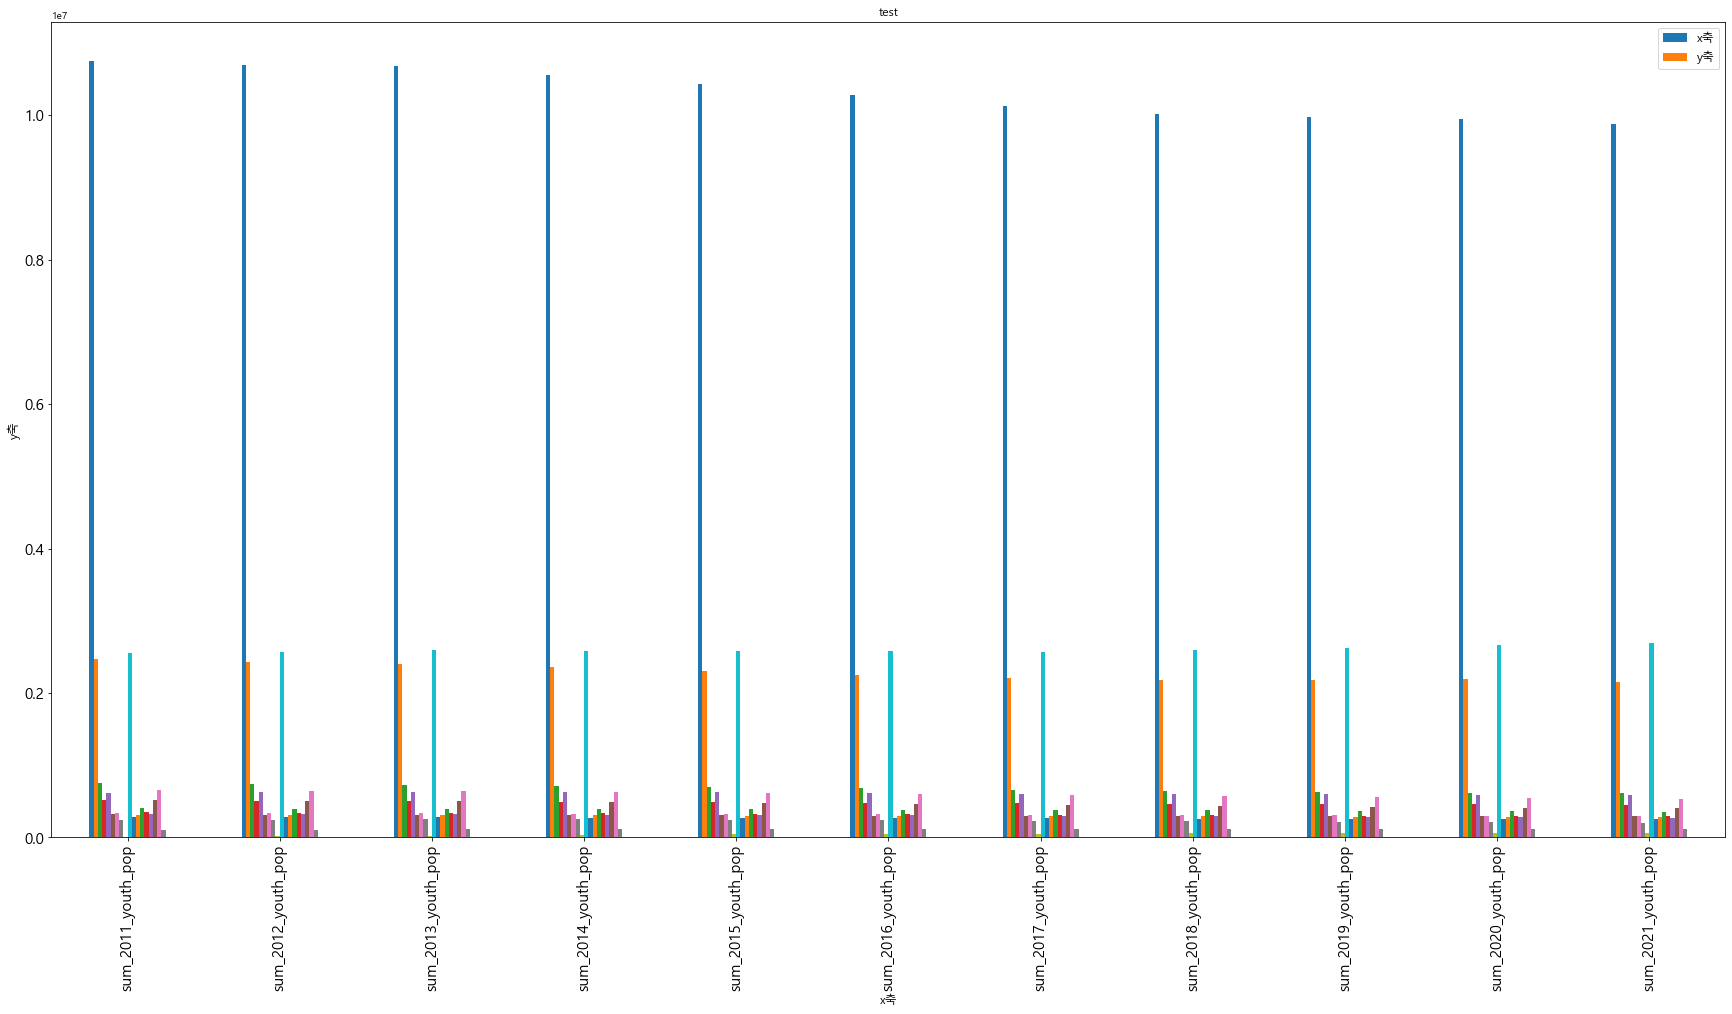

In [21]:
ax = df_all.plot(kind='bar', title='test', figsize=(30, 15), legend=True, fontsize=15)
ax.set_xlabel('x축', fontsize=12)          # x축 정보 표시
ax.set_ylabel('y축', fontsize=12)     # y축 정보 표시
ax.legend(['x축', 'y축'], fontsize=12)    # 범례 지정

## 그래프 그리기_2

In [22]:
df_all_revised = df_all.transpose().iloc[: , :]
df_all_revised = df_all_revised.transpose()
df_all_revised = df_all_revised.rename(index={'sum_2011_youth_pop': '2011', 
                                              'sum_2012_youth_pop': '2012', 
                                              'sum_2013_youth_pop': '2013',
                                             'sum_2014_youth_pop': '2014',
                                             'sum_2015_youth_pop': '2015',
                                            'sum_2016_youth_pop': '2016',
                                             'sum_2017_youth_pop': '2017',
                                             'sum_2018_youth_pop': '2018',
                                             'sum_2019_youth_pop': '2019',
                                             'sum_2020_youth_pop': '2020',
                                             'sum_2021_youth_pop': '2021'} )
df_all_revised

광역단체별,전국,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
2011,10751870,2469083,751352,516103,617105,317758,333878,242707,0,2549755,283277,309233,413530,349317,327641,513616,650211,107304
2012,10689546,2432676,739049,509847,625441,314888,332650,245598,21592,2563897,280089,306470,395500,343090,322564,505312,643256,107627
2013,10675651,2406676,730058,506372,634200,314205,332641,248488,23437,2588384,278991,306509,396519,339266,319580,500162,640275,109888
2014,10559495,2362242,714779,497003,630293,309793,328371,248519,30759,2582406,275676,303754,393257,333589,315407,490124,631558,111965
2015,10430435,2303682,698178,489817,624125,304080,321780,246421,41454,2580321,274373,301471,388409,328309,313211,479816,621201,113787
2016,10276296,2246208,678938,482567,615792,299315,317639,240393,46716,2579976,269510,298241,383389,322017,306944,465611,607576,115464
2017,10122912,2205731,659004,475150,606249,293813,311923,232019,52174,2574018,265291,293570,378772,314577,300320,451327,592042,116932
2018,10013334,2180139,640783,467881,599170,290845,307329,223936,57862,2589641,258682,291628,373643,306226,293173,437491,577171,117734
2019,9968586,2182481,628064,459446,595292,290503,303904,218080,61984,2618608,256215,289198,368029,299053,288002,427718,564668,117341
2020,9952151,2186793,621716,456190,587439,291507,303400,211967,63467,2668923,255093,287451,362894,294493,280920,412758,549349,117791


### 1. 비수도권과 수도권으로 나누기

In [23]:
df_all_revised_sudo = df_all_revised.iloc[:, [1, 4, 9]]
df_all_revised_notSudo = df_all_revised.iloc[:, [2, 3, 5, 6, 7, 8, 10 ,11, 12, 13, 14, 15, 16, 17]]

### 2. 수도권 그래프

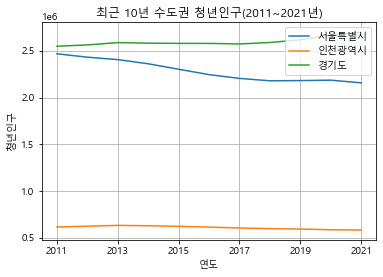

In [24]:
df_all_revised_sudo.plot()
plt.rcParams['figure.figsize'] = (20, 10) # rcParams: 그래프 설정 함수
plt.rcParams['lines.linewidth'] = 2
plt.rc('font', family = 'Malgun Gothic', size = 10) # 한글 폰트 설정
plt.xlabel('연도')
plt.ylabel('쳥년인구')
plt.title('최근 10년 수도권 청년인구(2011~2021년)')
plt.grid(True)
plt.legend(loc = 'upper right')
plt.show()

### 3. subplot 사용하기

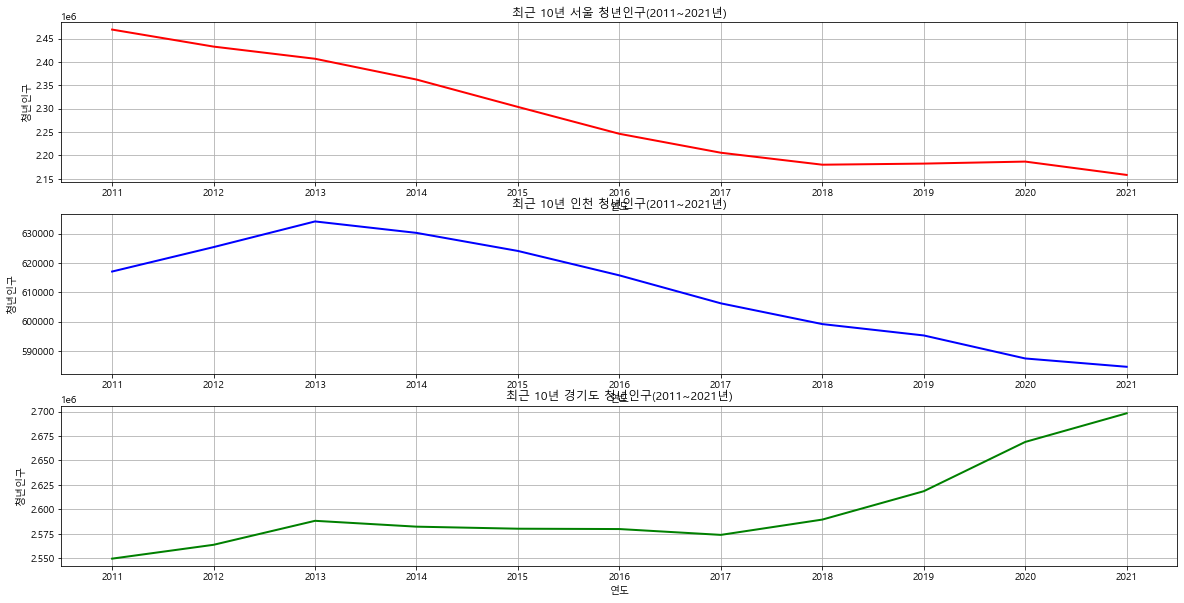

In [25]:
plt.subplot(3, 1, 1) # 3행 1열의 인덱스 1
plt.plot(df_all_revised.iloc[: , [1]], 'r')
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['lines.linewidth'] = 2
plt.rc('font', family = 'Malgun Gothic', size = 10)
plt.xlabel('연도')
plt.ylabel('쳥년인구')
plt.title('최근 10년 서울 청년인구(2011~2021년)')
plt.grid(True)

plt.subplot(3, 1, 2) # 3행 1열의 인덱스 2
plt.plot(df_all_revised.iloc[: , [4]], 'b')
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['lines.linewidth'] = 2
plt.rc('font', family = 'Malgun Gothic', size = 10)
plt.xlabel('연도')
plt.ylabel('쳥년인구')
plt.title('최근 10년 인천 청년인구(2011~2021년)')
plt.grid(True)

plt.subplot(3, 1, 3) # 3행 1열의 인덱스 3
plt.plot(df_all_revised.iloc[: , [9]], 'g')
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['lines.linewidth'] = 2
plt.rc('font', family = 'Malgun Gothic', size = 10)
plt.xlabel('연도')
plt.ylabel('쳥년인구')
plt.title('최근 10년 경기도 청년인구(2011~2021년)')
plt.grid(True)

plt.show()

### 4. subplot을 for 문으로 정리하기

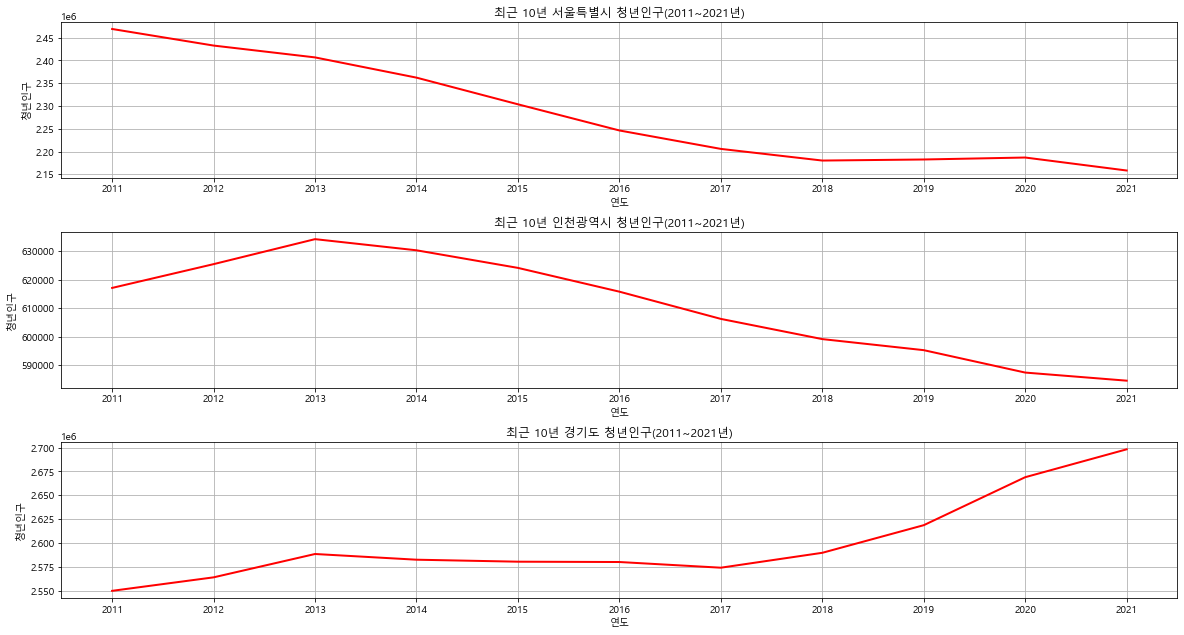

In [26]:
for i in range(0, 3):
    plt.subplot(3, 1, (i + 1)) # i 값에 따라 3행 1열의 인덱스가 결정
    plt.plot(df_all_revised_sudo.iloc[:, i], 'r')
    plt.rcParams['figure.figsize'] = (20, 10)
    plt.rcParams['lines.linewidth'] = 2
    plt.rc('font', family = 'Malgun Gothic', size = 10)
    plt.xlabel('연도')
    plt.ylabel('쳥년인구')
    plt.title(f'최근 10년 {df_all_revised_sudo.columns[i]} 청년인구(2011~2021년)')
    plt.grid(True) # 눈금 표시

# suplot_adjust 함수를 이용하여 subplot들 간 간격 조정하기 

plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)
plt.show()

### 5. 비수도권 그래프 그리기

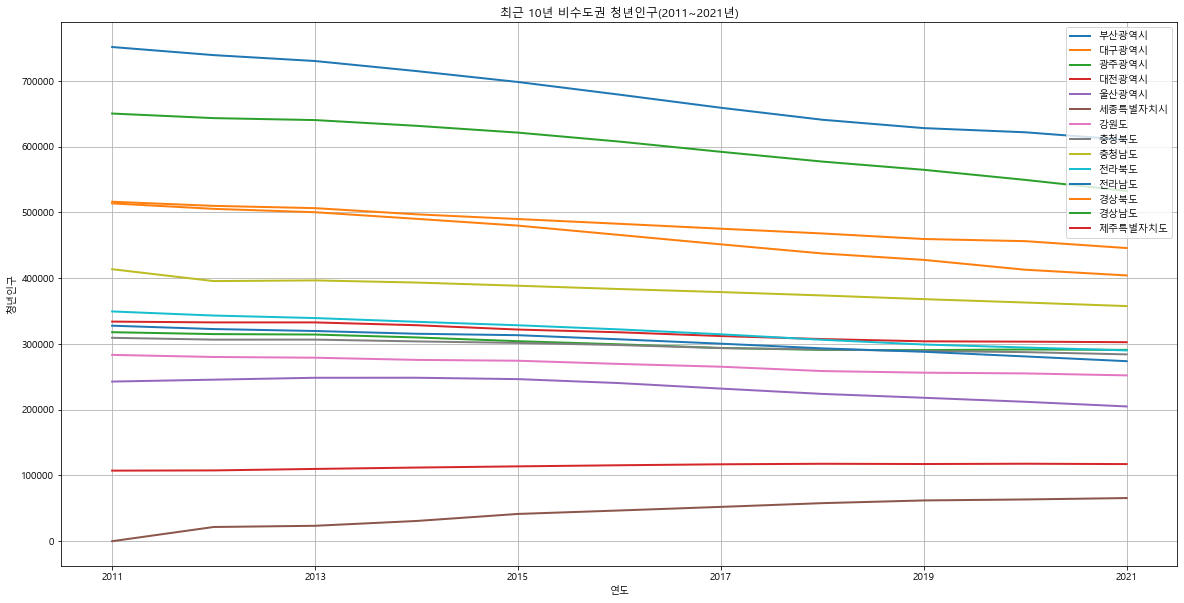

In [27]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['lines.linewidth'] = 2
plt.rc('font', family = 'Malgun Gothic', size = 10)
df_all_revised.iloc[:, [2, 3, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17]].plot()
plt.xlabel('연도')
plt.ylabel('쳥년인구')
plt.title('최근 10년 비수도권 청년인구(2011~2021년)')
plt.grid(True)
plt.legend(loc = 'upper right')
plt.show()

### 6.  for문으로 정리

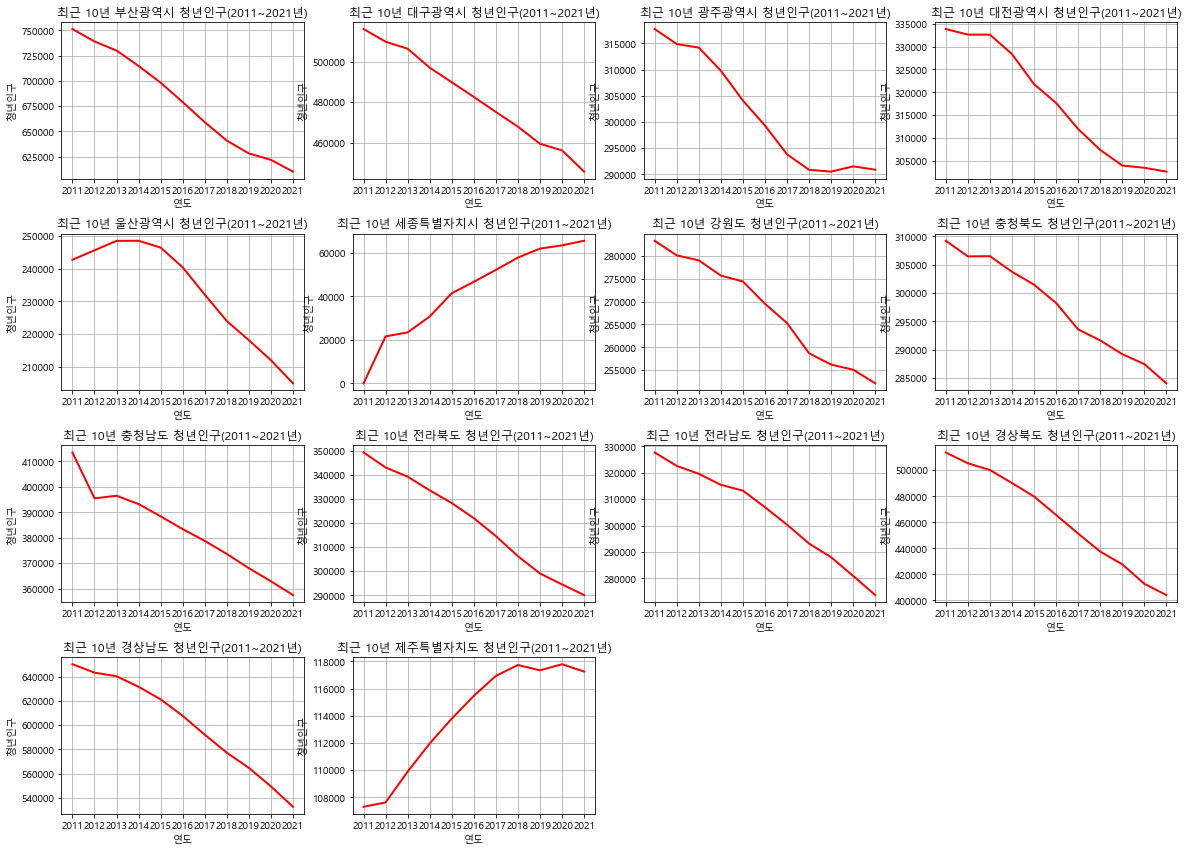

In [28]:
for i in range(0, 14):
    plt.subplot(4, 4, (i + 1)) # i 값에 따라 4행 4열의 인덱스가 결정
    plt.plot(df_all_revised_notSudo.iloc[:, i], 'r') # i 값에 따라 열이 결정
    plt.rcParams['figure.figsize'] = (20, 10)
    plt.rcParams['lines.linewidth'] = 2
    plt.rc('font', family = 'Malgun Gothic', size = 10)
    plt.xlabel('연도')
    plt.ylabel('쳥년인구')
    plt.title(f'최근 10년 {df_all_revised_notSudo.columns[i]} 청년인구(2011~2021년)')
    plt.grid(True)

# suplot_adjust 함수를 이용하여 subplot들 간 간격 조정하기     
    
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=1.2, wspace=0.2, hspace=0.35) # subplot 간의 격차 설정
plt.show()

### 7. ylim을 사용하여 y축 범위 재설정

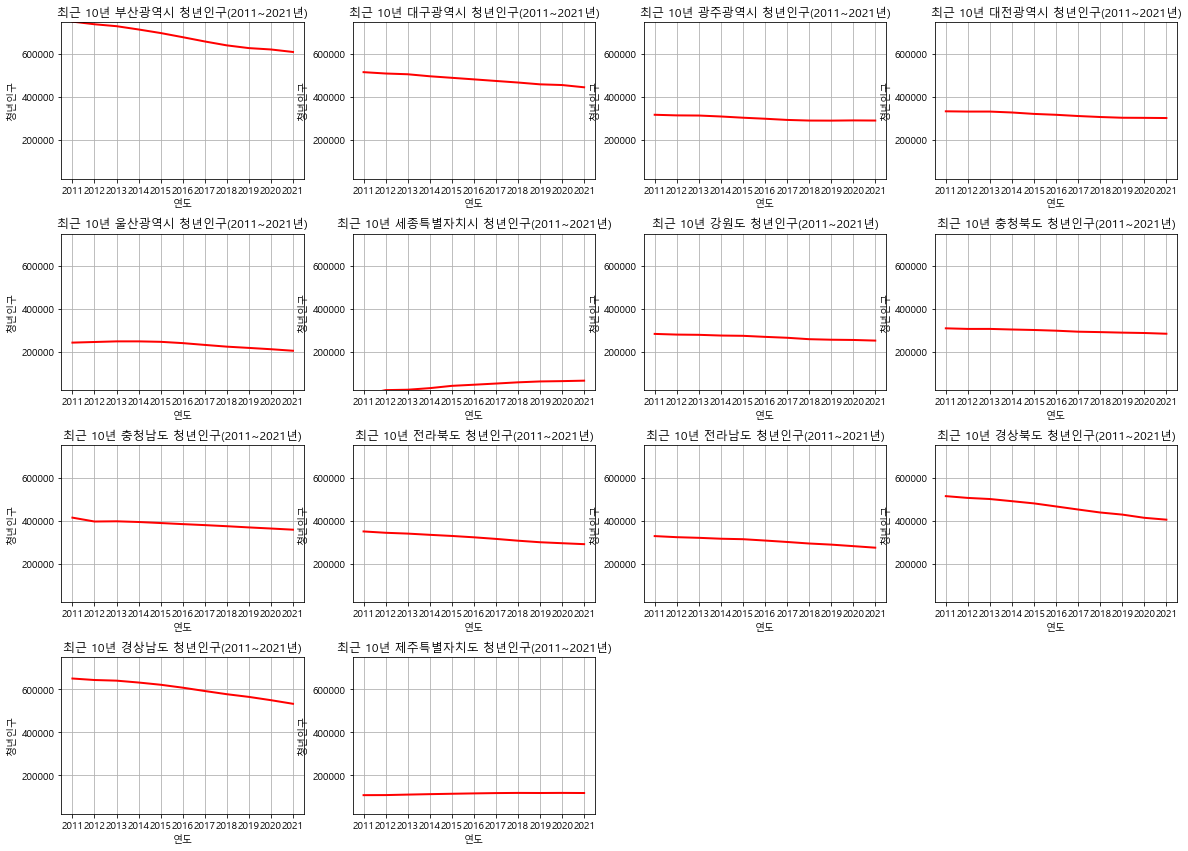

In [29]:
for i in range(0, 14):
    plt.subplot(4, 4, (i + 1))
    plt.plot(df_all_revised_notSudo.iloc[:, i], 'r')
    plt.rcParams['figure.figsize'] = (20, 10)
    plt.rcParams['lines.linewidth'] = 2
    plt.rc('font', family = 'Malgun Gothic', size = 10)
    plt.xlabel('연도')
    plt.ylabel('쳥년인구')
    plt.ylim(20000,750000)
    plt.title(f'최근 10년 {df_all_revised_notSudo.columns[i]} 청년인구(2011~2021년)')
    plt.grid(True)

plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top= 1.2, wspace=0.2, hspace=0.35) # subplot 간의 격차 설정
plt.show()